In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style("whitegrid")

## Mobile Price

In [161]:
df_mobile = pd.read_excel('Broadband Provider-Compare_v.2.xlsx',sheet_name='Mobile-11.21.19').loc[:61]

In [163]:
df_mobile.head()

,Parent,Parent.1,ISP,Tech Type,1 Line $/month,2 Lines $/month,3 Lines $/month,4 Lines $/month,Payment Type,Plan Name,...,5G,Customer Service,Taxes & Fees,Equipment,Throttling (GB),Pricing Notes,Extras,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,AT&T,AT&T Communications,AT&T Mobility,Mobile,80.0,150.0,170.0,190.0,Postpaid,Unlimited & More Premium,...,Not Included,NaN,Extra,NaN,22,W/autopay & paperless,Choose 1 premium channel,NaN,NaN,NaN
1,AT&T,AT&T Communications,AT&T Mobility,Mobile,75.0,130.0,150.0,160.0,Postpaid,Unlimited Extra,...,Not Included,NaN,Extra,NaN,50,W/autopay & paperless,NaN,NaN,NaN,NaN
2,AT&T,AT&T Communications,AT&T Mobility,Mobile,65.0,120.0,135.0,140.0,Postpaid,Unlimited Starter,...,Not Included,NaN,Extra,NaN,Duriung congestion,W/autopay & paperless,NaN,NaN,NaN,NaN
3,AT&T,AT&T Communications,AT&T Mobility,Mobile,35.0,NaN,NaN,NaN,Prepaid,1GB Data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T,AT&T Communications,AT&T Mobility,Mobile,50.0,NaN,NaN,NaN,Prepaid,8GB Data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# filter the price for the service of unilimited talk, unilimited text,and unilimited 4G data
df_mobile = df_mobile[(df_mobile['Talk']=='Unlimited') & (df_mobile['Text']=='Unlimited') & (df_mobile['4G Data (GB)']=='Unlimited')]




In [165]:
price = df_mobile.groupby('ISP').mean()
price

,1 Line $/month,2 Lines $/month,3 Lines $/month,4 Lines $/month,Service Days
ISP,,,,,
AT&T Mobility,72.000000,133.333333,151.666667,163.333333,30.00
Altice USA,25.000000,50.000000,75.000000,100.000000,30.00
Boost Mobile,56.250000,95.000000,135.000000,175.000000,30.25
Charter,55.000000,100.000000,145.000000,190.000000,30.00
Google Fi,70.000000,120.000000,150.000000,180.000000,30.00
Metro,50.000000,80.000000,110.000000,130.000000,30.00
Sprint,70.000000,120.000000,130.000000,140.000000,30.00
T-Mobile,71.666667,94.166667,121.666667,143.333333,30.00
Verizon Wireless,77.000000,140.000000,165.000000,180.000000,30.00


In [166]:
price.reset_index(inplace=True)

In [167]:
price

,ISP,1 Line $/month,2 Lines $/month,3 Lines $/month,4 Lines $/month,Service Days
0,AT&T Mobility,72.000000,133.333333,151.666667,163.333333,30.00
1,Altice USA,25.000000,50.000000,75.000000,100.000000,30.00
2,Boost Mobile,56.250000,95.000000,135.000000,175.000000,30.25
3,Charter,55.000000,100.000000,145.000000,190.000000,30.00
4,Google Fi,70.000000,120.000000,150.000000,180.000000,30.00
5,Metro,50.000000,80.000000,110.000000,130.000000,30.00
6,Sprint,70.000000,120.000000,130.000000,140.000000,30.00
7,T-Mobile,71.666667,94.166667,121.666667,143.333333,30.00
8,Verizon Wireless,77.000000,140.000000,165.000000,180.000000,30.00
9,Virgin Mobile,60.000000,NaN,NaN,NaN,30.00


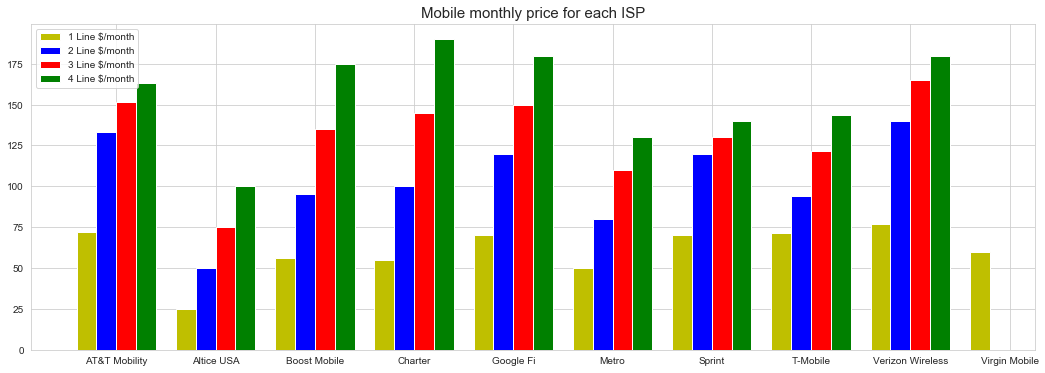

In [168]:
fig = plt.figure(figsize=(18,6))
index = price.index.values

bar_width = 0.2
plt.bar(index-1.5*bar_width, price['1 Line $/month'], width=bar_width , color='y', label='1 Line $/month')
plt.bar(index-0.5*bar_width, price['2 Lines $/month'], width=bar_width , color='b', label='2 Line $/month')
plt.bar(index+0.5*bar_width, price['3 Lines $/month'], width=bar_width , color='r', label='3 Line $/month')
plt.bar(index+1.5*bar_width, price['4 Lines $/month'], width=bar_width , color='g', label='4 Line $/month')
plt.xticks(index, price['ISP'])
plt.legend()
plt.title('Mobile monthly price for each ISP', size=15)
plt.show()

## Cable price

In [75]:
df_cable = pd.read_excel('Broadband Provider-Compare_v.2.xlsx',sheet_name='Cable-Historical-Protect')

In [76]:
df_cable.head()

,Year,Company,Borough,Tier,Tier Name,Price,CPI (Jan.),CPI (Oct. '19),"Price, CPI Adjusted (Oct. '19)",Add-On 1 Name,...,Add-on 5 Name,Add-On 5 Cost,Add-on 6 Name,Add-On 6 Cost,Add-on 7 Name,Add-On 7 Cost,Add-on 8 Name,Add-On 8 Cost,Add-on 9 Name,Add-On 9 Cost
0,2011,Altice,E. Brooklyn,1,Basic,15.52,220.223,257.346,18.136207,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Altice,E. Brooklyn,2,Family,58.95,220.223,257.346,68.887204,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,Altice,E. Brooklyn,3,iO Silver,83.95,220.223,257.346,98.101455,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,Altice,Bronx,1,Basic,15.52,220.223,257.346,18.136207,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,Altice,Bronx,2,Family,58.95,220.223,257.346,68.887204,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cable price by year')

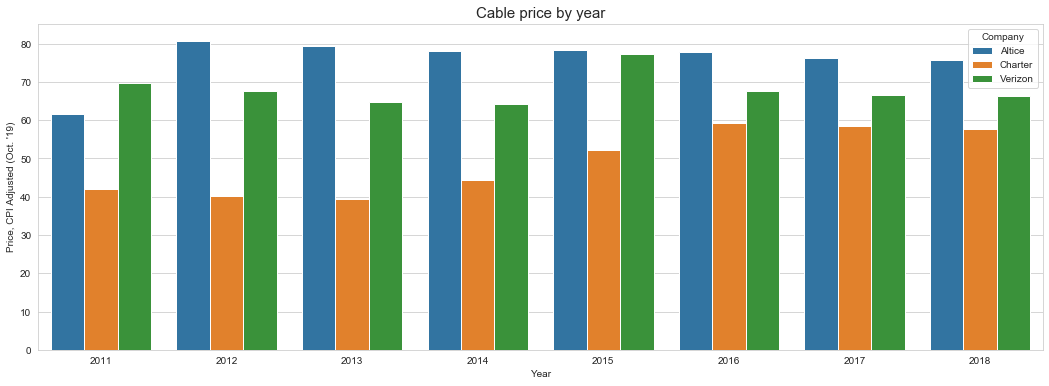

In [86]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x='Year', y='Price, CPI Adjusted (Oct. \'19)', hue='Company', data=df_cable, ci=0)
plt.title('Cable price by year', size=15)

In [93]:
df_cable[df_cable.Company=='Altice']

,Year,Company,Borough,Tier,Tier Name,Price,CPI (Jan.),CPI (Oct. '19),"Price, CPI Adjusted (Oct. '19)",Add-On 1 Name,...,Add-on 5 Name,Add-On 5 Cost,Add-on 6 Name,Add-On 6 Cost,Add-on 7 Name,Add-On 7 Cost,Add-on 8 Name,Add-On 8 Cost,Add-on 9 Name,Add-On 9 Cost
0,2011,Altice,E. Brooklyn,1,Basic,15.52,220.223,257.346,18.136207,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Altice,E. Brooklyn,2,Family,58.95,220.223,257.346,68.887204,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,Altice,E. Brooklyn,3,iO Silver,83.95,220.223,257.346,98.101455,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,Altice,Bronx,1,Basic,15.52,220.223,257.346,18.136207,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,Altice,Bronx,2,Family,58.95,220.223,257.346,68.887204,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011,Altice,Bronx,3,iO Silver,83.95,220.223,257.346,98.101455,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2012,Altice,E. Brooklyn,1,Basic Service,15.52,226.665,257.346,17.620762,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2012,Altice,E. Brooklyn,2,Optimum Value,64.95,226.665,257.346,73.741525,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2012,Altice,E. Brooklyn,3,Optimum Preferred,74.95,226.665,257.346,85.095108,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2012,Altice,E. Brooklyn,4,Optimum Silver,89.95,226.665,257.346,102.125483,Cable Box,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cable price by year')

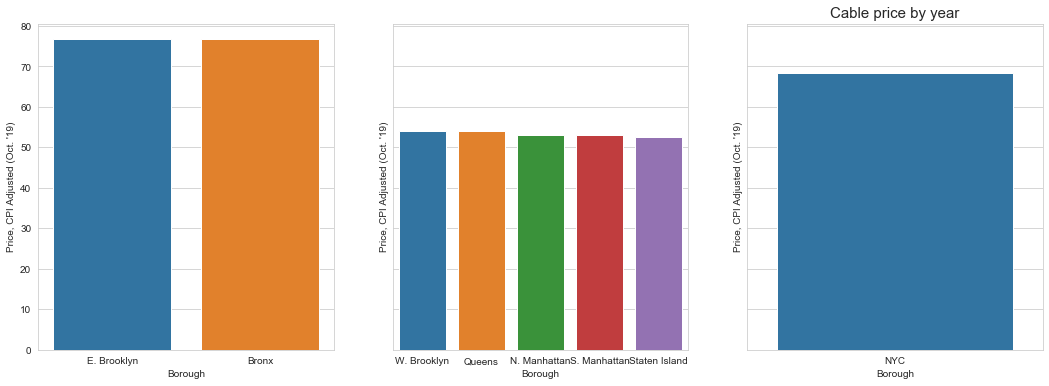

In [109]:
fig, axis = plt.subplots(1, 3, figsize=(18,6), sharey=True)
sns.barplot(x='Borough', y='Price, CPI Adjusted (Oct. \'19)', data=df_cable[df_cable.Company=='Altice'], ci=0, ax=axis[0])
sns.barplot(x='Borough', y='Price, CPI Adjusted (Oct. \'19)', data=df_cable[df_cable.Company=='Charter'], ci=0, ax=axis[1])
sns.barplot(x='Borough', y='Price, CPI Adjusted (Oct. \'19)', data=df_cable[df_cable.Company=='Verizon'], ci=0, ax=axis[2])
plt.title('Cable price by year', size=15)



In [145]:
df.rename()

array(['Company', 'Borough', "Price, CPI Adjusted (Oct. '19)"],
      dtype=object)

Text(0.5, 1.0, 'Cable price by service tier')

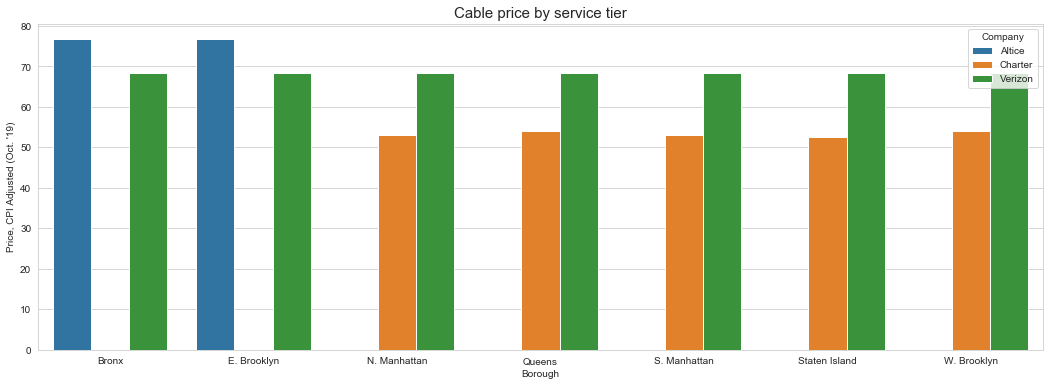

In [150]:
df2 = df_cable.groupby(['Company','Borough']).mean().reset_index()[['Company','Borough','Price, CPI Adjusted (Oct. \'19)']]
df3 = pd.DataFrame([['Verizon',i,df2[df2.Company=='Verizon'].iloc[0,2]] for i in df2.Borough], columns=df2.columns.values)
df4 = pd.concat([df2, df3],0)
df4 = df4[df4.Borough!='NYC']

fig = plt.figure(figsize=(18,6))
sns.barplot(x='Borough', y='Price, CPI Adjusted (Oct. \'19)', hue='Company', data=df4, ci=0)
plt.title('Cable price by borough', size=15)

Text(0.5, 1.0, 'Cable price by service tier')

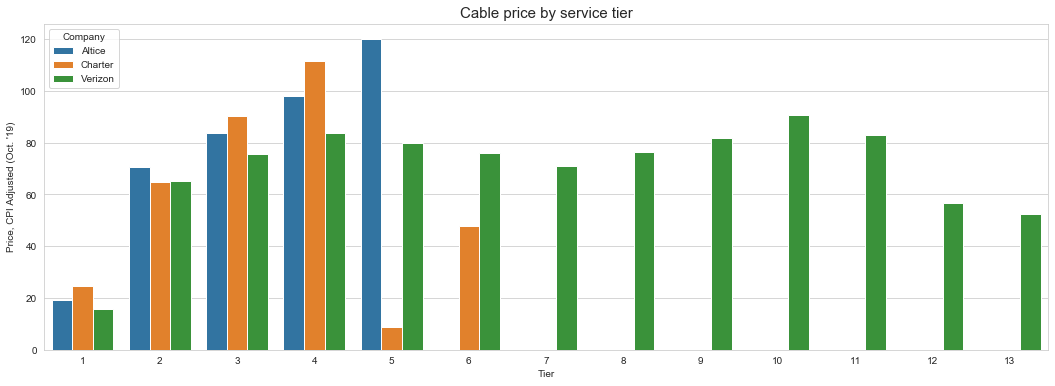

In [87]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x='Tier', y='Price, CPI Adjusted (Oct. \'19)', hue='Company', data=df_cable, ci=0)
plt.title('Cable price by service tier', size=15)

## Broadband price

In [151]:
df_bd = pd.read_excel('Broadband Provider-Compare_v.2.xlsx',sheet_name='Fixed Broadband')

In [152]:
df_bd.head()

,Parent,ISP,Plan,Download (Mbps),Upload (Mbps),Eligibility,Price,Wi-Fi Router Fee,Equipment Charge,Tax,Fees,Monthly Cost,Yearly Cost,Bronx,E. Brooklyn,W. Brooklyn,Manhattan,Queens,Staten Island,Notes
0,Altice,Altice USA,Advantage Internet,30.0,NaN,Limited,14.99,0.0,10.0,2.186625,NaN,27.176625,326.1195,Y,Y,N,N,N,N,NaN
1,Altice,Altice USA,Optimum 200,200.0,NaN,General,44.99,0.0,10.0,4.811625,NaN,59.801625,717.6195,Y,Y,N,N,N,N,NaN
2,Altice,Altice USA,Optimum 300,300.0,NaN,General,54.99,0.0,10.0,5.686625,NaN,70.676625,848.1195,Y,Y,N,N,N,N,NaN
3,Altice,Altice USA,Optimum 400,400.0,NaN,General,64.99,0.0,10.0,6.561625,NaN,81.551625,978.6195,Y,Y,N,N,N,N,NaN
4,NaN,BK Fiber,Basic,20.0,10.0,General,75.00,NaN,NaN,6.562500,NaN,81.562500,978.7500,N,N,L,L,L,N,NaN


Text(0.5, 1.0, 'Broadband price by ISP')

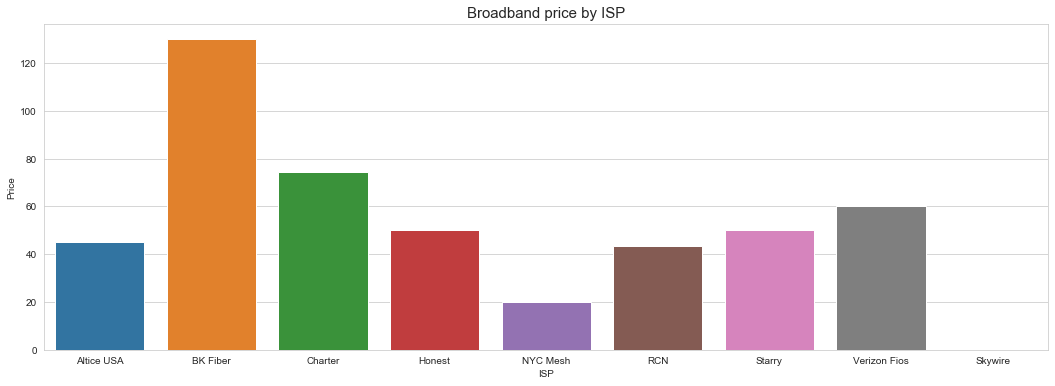

In [154]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x='ISP', y='Price', data=df_bd, ci=0)
plt.title('Broadband price by ISP', size=15)

In [160]:
# broadband coverage
# Y -- Yes, N -- No, L -- Limited, ? -- Unknown
df_bd.groupby('ISP').first()[['Bronx','E. Brooklyn', 'W. Brooklyn', 'Manhattan', 'Queens', 'Staten Island']]

,Bronx,E. Brooklyn,W. Brooklyn,Manhattan,Queens,Staten Island
ISP,,,,,,
Altice USA,Y,Y,N,N,N,N
BK Fiber,N,N,L,L,L,N
Charter,N,N,Y,Y,Y,Y
Honest,?,?,?,?,?,?
NYC Mesh,L,L,L,L,L,N
RCN,N,L,L,L,L,N
Skywire,L,L,Y,L,L,N
Starry,?,?,?,?,?,?
Verizon Fios,Y,Y,Y,Y,Y,Y
